In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)


# Customer 

In [9]:
import numpy as np
import pandas as pd

# Reproducibility
np.random.seed(42)

# Number of customers
n_customers = 10000

# Generate customer data
customers = pd.DataFrame({
    "customer_id": range(1, n_customers + 1),
    "age": np.random.randint(22, 66, n_customers),
    "income": np.random.lognormal(mean=11, sigma=0.5, size=n_customers).round(0),
    "employment_type": np.random.choice(
        ["Full-time", "Part-time", "Self-employed", "Contract"],
        size=n_customers,
        p=[0.55, 0.15, 0.2, 0.1]
    ),
    "dependents": np.random.choice(
        [0, 1, 2, 3],
        size=n_customers,
        p=[0.45, 0.3, 0.2, 0.05]
    ),
    "state": np.random.choice(
        ["NSW", "VIC", "QLD", "WA", "SA"],
        size=n_customers,
        p=[0.35, 0.28, 0.2, 0.1, 0.07]
    )
})

# Credit score band correlated with income
customers["credit_score_band"] = pd.cut(
    customers["income"],
    bins=[0, 60000, 100000, 150000, np.inf],
    labels=["Low", "Medium", "Good", "Excellent"]
)

# Save to CSV
customers.to_csv("../Datasets/customers.csv", index=False)



In [10]:
customers.head()

,customer_id,age,income,employment_type,dependents,state,credit_score_band
0,1,60,56310.0,Full-time,0,NSW,Low
1,2,50,53746.0,Full-time,2,SA,Low
2,3,36,54968.0,Self-employed,1,SA,Low
3,4,64,149510.0,Full-time,0,WA,Good
4,5,29,34636.0,Full-time,0,VIC,Low


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        10000 non-null  int64   
 1   age                10000 non-null  int32   
 2   income             10000 non-null  float64 
 3   employment_type    10000 non-null  object  
 4   dependents         10000 non-null  int64   
 5   state              10000 non-null  object  
 6   credit_score_band  10000 non-null  category
dtypes: category(1), float64(1), int32(1), int64(2), object(2)
memory usage: 439.8+ KB


# Brokers

In [13]:
import numpy as np
import pandas as pd

# Reproducibility
np.random.seed(42)

# Number of brokers
n_brokers = 500  # slightly higher to support more brands

# Broker brands and realistic market share
brands = ["Lendi", "Aussie", "Loan Market", "Mortgage Choice", "Smartline"]
brand_probs = [0.25, 0.25, 0.2, 0.18, 0.12]

# Generate broker data
brokers = pd.DataFrame({
    "broker_id": range(1, n_brokers + 1),
    "brand": np.random.choice(
        brands,
        size=n_brokers,
        p=brand_probs
    ),
    "experience_years": np.random.randint(1, 21, n_brokers),
    "store_location": np.random.choice(
        ["NSW", "VIC", "QLD", "WA", "SA"],
        size=n_brokers,
        p=[0.35, 0.28, 0.2, 0.1, 0.07]
    )
})

# Conversion rate depends on experience (with noise)
brokers["conversion_rate"] = (
    0.14
    + brokers["experience_years"] * 0.012
    + np.random.normal(0, 0.035, n_brokers)
).clip(0.1, 0.6)

# Active loans scale with experience
brokers["active_loans"] = (
    brokers["experience_years"] * np.random.randint(6, 16, n_brokers)
)

# Save to CSV
brokers.to_csv("../Datasets/brokers.csv", index=False)




In [14]:
brokers.head()

,broker_id,brand,experience_years,store_location,conversion_rate,active_loans
0,1,Aussie,17,NSW,0.393159,238
1,2,Smartline,9,WA,0.191806,90
2,3,Mortgage Choice,1,QLD,0.169634,15
3,4,Loan Market,20,QLD,0.304614,200
4,5,Lendi,13,WA,0.320752,91


In [15]:
brokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   broker_id         500 non-null    int64  
 1   brand             500 non-null    object 
 2   experience_years  500 non-null    int32  
 3   store_location    500 non-null    object 
 4   conversion_rate   500 non-null    float64
 5   active_loans      500 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 19.7+ KB


# Loan Applications

In [24]:
import numpy as np
import pandas as pd

# -------------------------------
# Reproducibility
# -------------------------------
np.random.seed(42)

# -------------------------------
# Load existing datasets
# -------------------------------
customers = pd.read_csv("../Datasets/customers.csv")
brokers = pd.read_csv("../Datasets/brokers.csv")

# -------------------------------
# Number of applications
# -------------------------------
n_apps = 20000

# -------------------------------
# Base application table
# -------------------------------
loan_apps = pd.DataFrame({
    "application_id": range(1, n_apps + 1),
    "customer_id": np.random.choice(customers["customer_id"], n_apps),
    "broker_id": np.random.choice(brokers["broker_id"], n_apps),
    "submitted_date": pd.to_datetime(
        np.random.choice(
            pd.date_range("2017-01-01", "2024-12-31", freq="D"),
            n_apps
        )
    ),
    "application_channel": np.random.choice(
        ["Online", "Broker"],
        size=n_apps,
        p=[0.4, 0.6]
    )
})

# -------------------------------
# Merge customer & broker info
# -------------------------------
loan_apps = loan_apps.merge(customers, on="customer_id", how="left")
loan_apps = loan_apps.merge(
    brokers[["broker_id", "brand", "experience_years"]],
    on="broker_id",
    how="left"
)

# -------------------------------
# Property & loan values (income-driven)
# -------------------------------
loan_apps["property_value"] = (
    loan_apps["income"] * np.random.uniform(4.5, 7.0, n_apps)
).round(0)

loan_apps["loan_amount"] = (
    loan_apps["property_value"] * np.random.uniform(0.6, 0.9, n_apps)
).round(0)

loan_apps["lvr"] = loan_apps["loan_amount"] / loan_apps["property_value"]

# -------------------------------
# Interest rate (base + risk margin)
# -------------------------------
loan_apps["interest_rate"] = (
    3.0
    + loan_apps["lvr"] * 2.2
    + np.random.normal(0, 0.4, n_apps)
).round(2)

# -------------------------------
# IMBALANCED TARGET GENERATION (~72–73% Approved)
# -------------------------------
approval_score = (
    1.95                                  # higher base → more approvals
    - loan_apps["lvr"] * 0.9              # mild LVR penalty
    + (loan_apps["income"] / loan_apps["income"].max()) * 0.7
    + (loan_apps["experience_years"] / 20) * 0.4
    - loan_apps["interest_rate"] * 0.05
)

approval_prob = 1 / (1 + np.exp(-approval_score))

loan_apps["approved"] = np.random.binomial(1, approval_prob)

# -------------------------------
# Check target distribution
# -------------------------------
target_counts = loan_apps["approved"].value_counts()
target_percent = loan_apps["approved"].value_counts(normalize=True) * 100
print("Target Variable Distribution (Approved vs Rejected):\n")
print(pd.DataFrame({
    "count": target_counts,
    "percentage (%)": target_percent.round(2)
}))

# -------------------------------
# Keep only required columns for ML
# -------------------------------
loan_apps = loan_apps[[
    "application_id",
    "customer_id",
    "broker_id",
    "brand",
    "application_channel",
    "submitted_date",
    "loan_amount",
    "property_value",
    "lvr",
    "interest_rate",
    "approved"
]]

# -------------------------------
# Save to CSV
# -------------------------------
loan_apps.to_csv("../Datasets/loan_applications.csv", index=False)
print("\nSaved file: ../Datasets/loan_applications.csv")


Target Variable Distribution (Approved vs Rejected):

          count  percentage (%)
approved                       
1         15877           79.38
0          4123           20.62

Saved file: ../Datasets/loan_applications.csv


In [25]:
loan_apps.head()

,application_id,customer_id,broker_id,brand,application_channel,submitted_date,loan_amount,property_value,lvr,interest_rate,approved
0,1,7271,168,Lendi,Online,2022-06-21,238381.0,270397.0,0.881596,4.94,1
1,2,861,293,Mortgage Choice,Broker,2022-11-01,267329.0,385223.0,0.693959,4.32,1
2,3,5391,374,Loan Market,Online,2017-11-13,396190.0,498657.0,0.794514,4.02,0
3,4,5192,49,Loan Market,Online,2024-05-16,177813.0,233186.0,0.762537,4.85,0
4,5,5735,250,Mortgage Choice,Online,2023-08-15,195103.0,250535.0,0.778745,4.57,1


Target Variable Distribution (approved):

          count  percentage (%)
approved                       
0          4123           20.62
1         15877           79.38


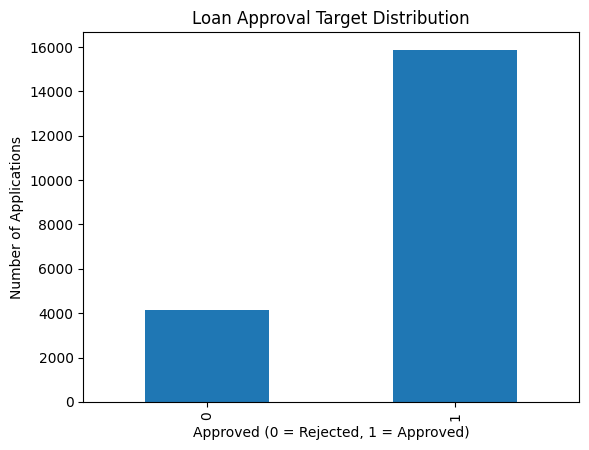

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
loan_apps = pd.read_csv("../Datasets/loan_applications.csv")

# Count & percentage distribution
target_counts = loan_apps["approved"].value_counts().sort_index()
target_percent = loan_apps["approved"].value_counts(normalize=True).sort_index() * 100

print("Target Variable Distribution (approved):\n")
print(pd.DataFrame({
    "count": target_counts,
    "percentage (%)": target_percent.round(2)
}))

# Simple bar plot
plt.figure()
target_counts.plot(kind="bar")
plt.xlabel("Approved (0 = Rejected, 1 = Approved)")
plt.ylabel("Number of Applications")
plt.title("Loan Approval Target Distribution")
plt.show()
